In [36]:
import os
import warnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt
import math

from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.preprocessing import MinMaxScaler
from IPython.display import Image

In [42]:
pd.options.display.float_format = '{:.2f}'.format

df = pd.read_csv('energy.csv')
df

,timestamp,load,temp
0,2012-01-01 00:00:00,2698.00,32.00
1,2012-01-01 01:00:00,2558.00,32.67
2,2012-01-01 02:00:00,2444.00,30.00
3,2012-01-01 03:00:00,2402.00,31.00
4,2012-01-01 04:00:00,2403.00,32.00
...,...,...,...
26299,2014-12-31 19:00:00,4012.00,18.00
26300,2014-12-31 20:00:00,3856.00,16.67
26301,2014-12-31 21:00:00,3671.00,17.00
26302,2014-12-31 22:00:00,3499.00,15.33


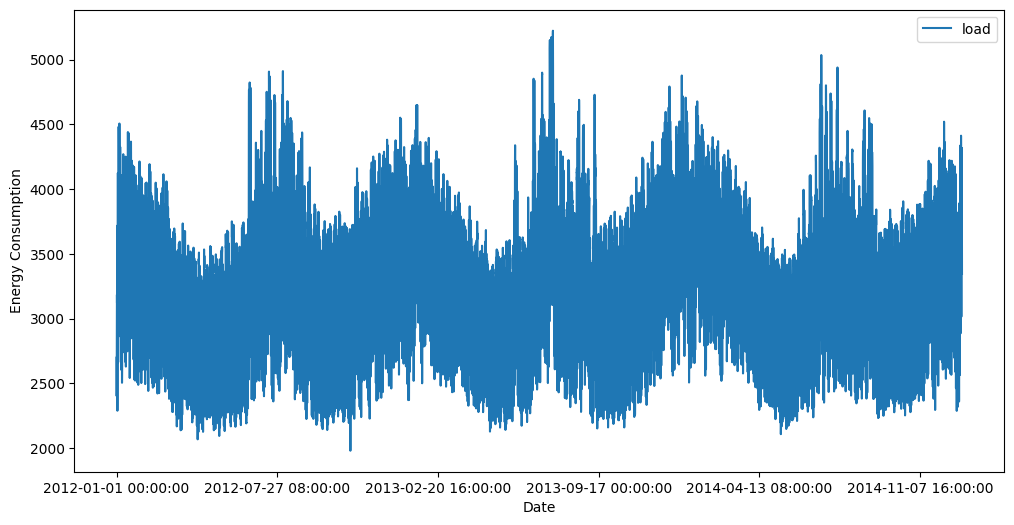

In [26]:
plot = df.plot(x='timestamp', y='load', figsize=(12, 6))
plot.set_xlabel('Date')
plot.set_ylabel('Energy Consumption')
plt.show()

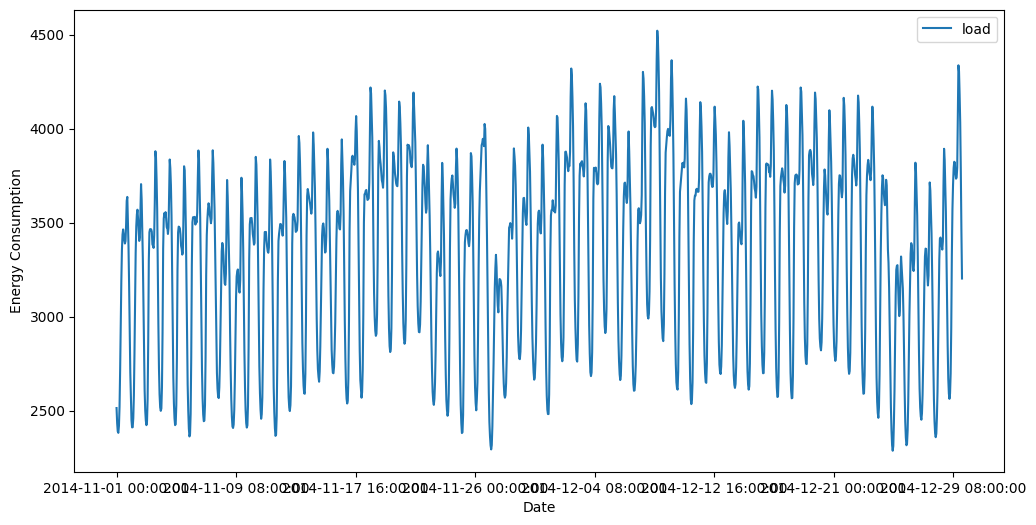

In [43]:
# plot a slice of time from 2014-11-01 to 2014-12-30
plot = df[(df['timestamp'] >= '2014-11-01') & (df['timestamp'] <= '2014-12-30')].plot(x='timestamp', y='load', figsize=(12, 6))
plot.set_xlabel('Date')
plot.set_ylabel('Energy Consumption')
plt.show()

In [45]:
train_start_dt = '2014-11-01 00:00:00'
test_start_dt = '2014-12-30 00:00:00'


train = df[(df['timestamp'] >= train_start_dt) & (df['timestamp'] < test_start_dt)][['load']]
test = df[df['timestamp'] >= test_start_dt][['load']]

train.shape, test.shape

((1416, 1), (48, 1))

In [50]:
scaler = MinMaxScaler()
train['load'] = scaler.fit_transform(train)
test['load'] = scaler.transform(test)

Selecting the best values for an ARIMA model's parameters can be challenging as it's somewhat subjective and time intensive. You might consider using an auto_arima() function from the pyramid library,

In [48]:
order = (4, 1, 0)
seasonal_order = (1, 1, 0, 24)

model = SARIMAX(endog=train, order=order, seasonal_order=seasonal_order)
results = model.fit()

print(results.summary())

c:\Users\Kresna\miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Kresna\miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                               load   No. Observations:                 1416
Model:             SARIMAX(4, 1, 0)x(1, 1, 0, 24)   Log Likelihood                3477.240
Date:                            Sat, 15 Jul 2023   AIC                          -6942.480
Time:                                    22:22:06   BIC                          -6911.053
Sample:                                         0   HQIC                         -6930.728
                                           - 1416                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8402      0.016     52.148      0.000       0.809       0.872
ar.L2         -0.5228      0.034   